In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score
import matplotlib.colors as mcolors

In [112]:
df = pd.read_csv("/content/cleaned_data (1).csv")

In [113]:
X = df.drop(['target' , 'degree'], axis=1)
y = df["target"]

In [114]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

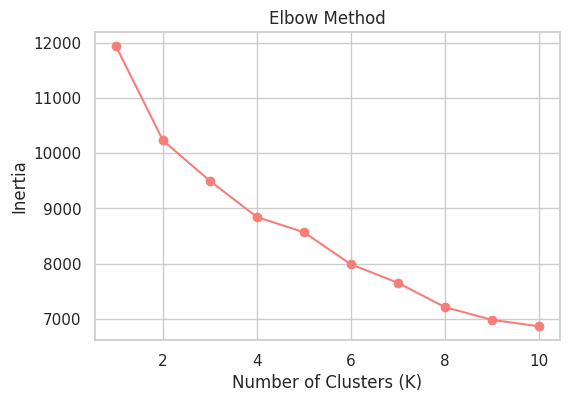

In [115]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o' , color = '#f67f79')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [116]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

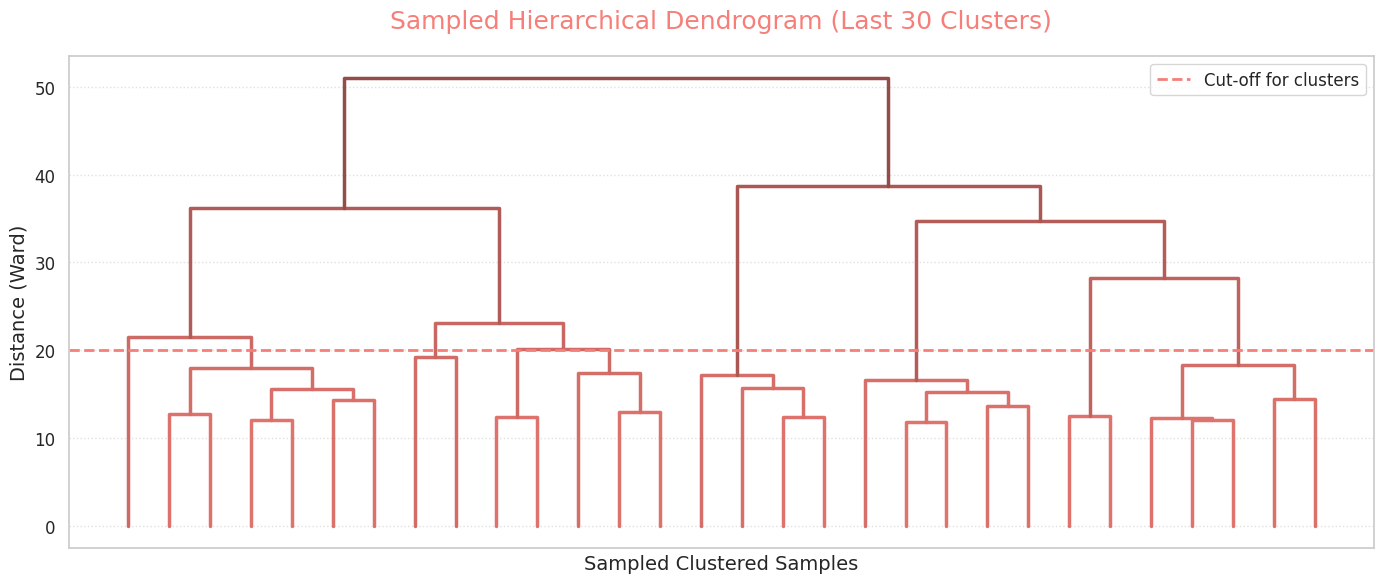

In [117]:
sns.set(style="whitegrid")
linkage_matrix = linkage(X_scaled, method='ward')
ddata = dendrogram(linkage_matrix, truncate_mode='lastp', p=30, no_plot=True)
base_color = mcolors.to_rgb("#f67f79")
max_height = max(y for _, ys in zip(ddata['icoord'], ddata['dcoord']) for y in ys)
plt.figure(figsize=(14, 6))
for xs, ys in zip(ddata['icoord'], ddata['dcoord']):
    height = max(ys)
    factor = height / max_height
    shade = tuple(base_color[i] * (1 - 0.4 * factor) for i in range(3))
    plt.plot(xs, ys, color=shade, linewidth=2.5)
plt.axhline(y=20, color='#f67f79', linestyle='--', linewidth=2, label='Cut-off for clusters')
plt.title("Sampled Hierarchical Dendrogram (Last 30 Clusters)", fontsize=18, color='#f67f79', pad=20)
plt.xlabel("Sampled Clustered Samples", fontsize=14)
plt.ylabel("Distance (Ward)", fontsize=14)
plt.xticks([])
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

In [118]:
hc = AgglomerativeClustering(n_clusters=k)
hc_labels = hc.fit_predict(X_scaled)

In [119]:
ari_kmeans = adjusted_rand_score(y, kmeans_labels)
ari_hc = adjusted_rand_score(y, hc_labels)

print(f"Adjusted Rand Index - KMeans: {ari_kmeans:.3f}")
print(f"Adjusted Rand Index - Hierarchical: {ari_hc:.3f}")

Adjusted Rand Index - KMeans: 0.203
Adjusted Rand Index - Hierarchical: 0.176
